# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# Create two new dataframes

ndf = pd.read_csv('NorthCallCenter.csv')
sdf = pd.read_csv('SouthCallCenter.csv')

# Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [2]:
# Put your EDA code here

#How many reps are in North branch? There are 9
n_reps = ndf.nunique()
n_reps

#How many reps are in South branch? There are 11
s_reps = sdf.nunique()
s_reps



Unnamed: 0               314
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                    11
Sale                       2
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

In [3]:
#What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?

ndf.describe()
# ave busy min = 9.98
# ave not ready min = 1.9
# ave incoming wait time = 3.05 sec
# ave during call wait = 2.96

sdf.describe()
# ave busy min = 10.05
# ave not ready min = 1.91
# ave incoming wait time = 3 sec
# ave during call wait = 3.08



,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [4]:
#What is the number of calls taken for each time block?

n_calls = ndf.groupby('Time Block')
n_calls.count()

s_calls = sdf.groupby('Time Block')
s_calls.count()




,Unnamed: 0,Branch,Call Purpose,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Time Block,,,,,,,,,,,,,,
10:00 AM,56,56,56,56,56,56,56,56,56,56,56,21,56,56
11:00 AM,31,31,31,31,31,31,31,31,31,31,31,12,31,31
12:00 PM,75,75,75,75,75,75,75,75,75,75,75,25,75,75
1:00 PM,23,23,23,23,23,23,23,23,23,23,23,10,23,23
2:00 PM,30,30,30,30,30,30,30,30,30,30,30,14,30,30
3:00 PM,43,43,43,43,43,43,43,43,43,43,43,20,43,43
4:00 PM,25,25,25,25,25,25,25,25,25,25,25,12,25,25
5:00 PM,26,26,26,26,26,26,26,26,26,26,26,10,26,26
9:00 AM,5,5,5,5,5,5,5,5,5,5,5,2,5,5


### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [5]:
# Clean your data here

# 1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls? YES

#Filter then value counts. Can look at null value counts and outgoing call counts and compare.

Outgoing_ndf = ndf.value_counts('Incoming or Outgoing', dropna = False)
Outgoing_ndf

Wait_time_ndf = ndf.value_counts('Incoming Wait Time', dropna = False)
Wait_time_ndf

#ndf[ndf['Incoming Wait Time'] == np.nan]
# KEEP GOING

Incoming Wait Time
NaN    163
4.0     20
1.0     17
5.0     17
2.0     16
3.0     12
dtype: int64

In [6]:
# 2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
# I REPLACED BOTH YES VALUES WITH 'Yes' - one had an extra space after it
# I RECTIFIED IT FOR CONSISTENCY

ndf.value_counts('Sale', dropna = False)

ndf = ndf.replace({"Sale": {'YES': "Yes", 'YES ': 'Yes', 'NO': 'No'}})
ndf.value_counts('Sale', dropna = False)


Sale
No     234
Yes     11
dtype: int64

In [7]:
# 3. Are there duplicates in the two data sets? If there are, how did you handle them?

#ndf.shape
#245, 12

duplicate_rows_ndf = ndf[ndf.duplicated()]
#print("Number of duplicated rows: ", duplicate_rows_ndf.shape)
#0, 12

duplicate_rows_ndf

# THERE ARE NO DUPLICATES IN NDF

sdf.shape
#314, 15

duplicate_rows_sdf = sdf[sdf.duplicated()]
duplicate_rows_sdf

# THERE ARE NO DUPLICATES IN SDF

# UNNAMED:0 IS index in csv but pandas sees it as a column. REMOVE! but not necessary

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [8]:
# 4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

#new_ndf = ndf.drop(['Call Purpose', 'Queue', 'Sale'], axis = 1)
#new_ndf

updated_ndf = ndf.drop(['Unnamed: 0'], axis = 1)
updated_ndf

updated_sdf = sdf.drop(['Unnamed: 0'], axis = 1)
updated_sdf

# DO THIS QUESTION AT THE END BECAUSE WE DON'T ACTUALLY KNOW WHAT WE'LL USE AND WON'T USE

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [9]:
updated_ndf.columns

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')

In [10]:
updated_sdf.columns

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')

### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [11]:
# Manipulate data here

#COMBINE THE TWO DATASETS
df = pd.concat([updated_ndf, updated_sdf], axis = 0)
df



,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,No,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,No,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,No,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,No,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,No,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [12]:
# 1. Group by Rep ID and sum the resulting structure. 
# Sort by calls to determine which rep in each branch has the highest number of calls.

#rep_sum = ndf.groupby(['Rep ID']).sum()
#rep_sum

#rep_sum.sort_values(by=['Branch'])

north_branch_sum = ndf.groupby('Rep ID').sum().sort_values(by = ['Calls'])
north_branch_sum

south_branch_sum = sdf.groupby('Rep ID').sum().sort_values(by = ['Calls'])
south_branch_sum


# In the North branch, Brent had the most calls and in the South branch, Eric had the most calls.


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Alice,3637,0,0,199,46,15.0,58,20
Sharon,4226,1,1,257,38,29.0,77,25
Josh,3960,3,0,260,50,31.0,83,26
Susan,4006,2,0,267,53,35.0,88,26
Karl,4532,1,0,287,61,26.0,85,28
George,4620,0,0,298,53,41.0,87,29
Kate,4615,0,0,291,61,37.0,83,29
Helga,5236,0,2,292,58,36.0,95,31
Sandy,4694,1,0,325,60,34.0,100,32


In [13]:
# 2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. 
# As you may recall, abandoned calls are calls where the customer hangs up due to long call times. 
# What is the average call abandonment rate for each branch and the whole company? 
# Do any of these fall out of the optimal range of 2-5%?

# YES, THE AVE CALL ABANDONMENT RATE FOR THE SOUTH BRANCH IS 1.2% WHICH FALLS OUTSIDE OF OPTIMAL RANGE

df.groupby(by="Branch").mean()

#take df abandonment column, sum, divided by calls and multiply by 100
#REDO THIS ONE using two variables - abandonment and calls

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Branch,,,,,,,
North,0.020408,0.028571,9.987755,1.914286,3.04878,2.967347,1.0
South,0.035032,0.012739,10.054140,1.910828,3.00000,3.076433,1.0


In [14]:
# 3. Service level is another KPI when it comes to measuring call center efficiency. 
# Service level is the percentage of calls answered within a specific number of seconds. 
# In the case of your employer, their ideal time frame is 2 seconds. 
# What is the percentage of calls answered within 2 seconds for each company and the entire company?

#Busy Minutes: the amount of time after a call comes in or needs to go out where 
#the assigned rep is not available because they are busy with other customers.
#Not Ready Minutes: the amount of time after a call comes in or needs to go out where 
#the assigned rep is not available because they are not ready (for example, getting water).
#Incoming Wait Time - amount of time after assigned rep is available to take 
#the call customer waits for representative to pick up a call. This is tracked in seconds.
#During Call Wait Time - amount of time during call that customer has to wait for representative

company_seconds = (df['Incoming Wait Time'] <=2).sum() #81 calls
company_calls = (df['Calls']).sum() #559 total calls in the company
company_perc = ((company_seconds/company_calls)*100).round(2)
company_perc #14.49% of calls were answered within 2 sec or less

north_seconds = (ndf['Incoming Wait Time'] <= 2).sum() #33 calls
north_calls = (ndf['Calls']).sum() #245 total calls in the North branch
north_perc = ((north_seconds/north_calls)*100).round(2)
north_perc #13.47% of calls in the North branch were answered within 2 sec or less

south_seconds = (sdf['Incoming Wait Time'] <=2).sum() #48 calls
south_calls = (sdf['Calls']).sum() #314 total calls in the South branch
south_perc = ((south_seconds/south_calls)*100).round(2)
south_perc #15.29% of calls in the South branch were answered within 2 sec or less



15.29

In [15]:
# 4. For each branch and the entire company, what is the average speed of answer?

company_ave_speed = df['Incoming Wait Time'].agg('mean')
company_ave_speed #ave speed of answer is 3.02 seconds for the company

north_ave_speed = ndf['Incoming Wait Time'].agg('mean')
north_ave_speed #ave speed of answer is 3.05 seconds for the North branch

south_ave_speed = sdf['Incoming Wait Time'].agg('mean')
south_ave_speed #ave speed of answer is 3 seconds for the South branch



3.0

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

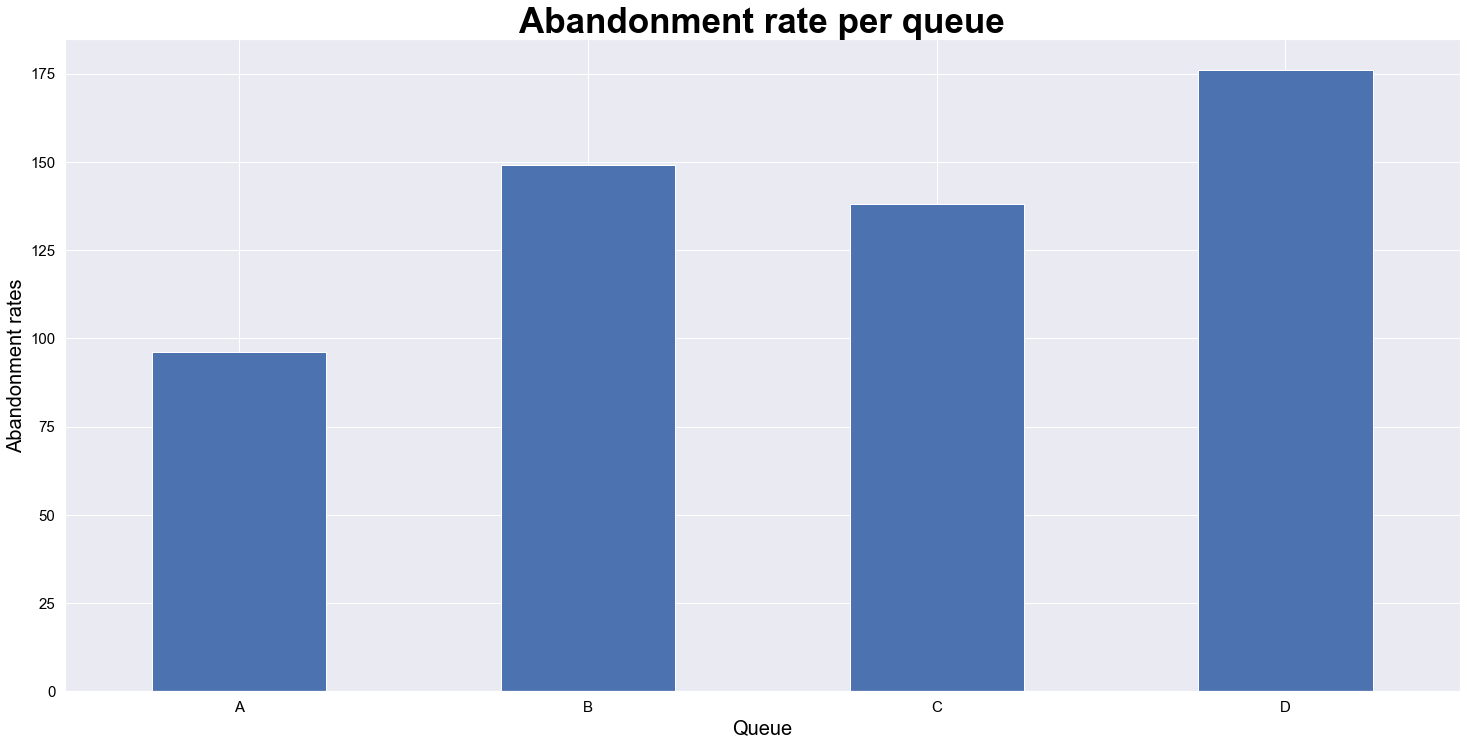

In [16]:
# Create visualization 1 here
# 1. What is the average abandonment rate per queue?
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    
style.use('ggplot')

sb.set(rc={"figure.figsize":(25, 12)}) #width=25, #height=4

df_total=df['Queue'].sort_values().value_counts(sort = False)
df_total.plot(kind = 'bar', legend = False)
plt.title('Abandonment rate per queue', color = "black", fontsize = 35, fontweight = 'bold')
plt.xticks(color = 'black', rotation = 0, fontsize = 15)
plt.yticks(color = 'black', fontsize = 15)
plt.xlabel('Queue',color = 'black', fontsize = 20)
plt.ylabel('Abandonment rates', color = 'black', fontsize = 20)
#plt.savefig('bar_vertical.png')

plt.show()


In [17]:
# Create visualization 2 here
# 2. What is the service level and average speed of answer per each rep?

# north_plt contains the data you need for the average speed of answer of each rep

#north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
#quick_calls = north[north["Incoming Wait Time"] <= 2.0]
#quick_reps = quick_calls[["Rep ID", "Calls"]]
#quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
#total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
#rep_calls = total_calls_in[["Rep ID", "Calls"]]     
#total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
#service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
#service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100




north_plt = updated_ndf.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
# Finding each Rep's Personal Service Level Percentage. Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = updated_ndf[updated_ndf["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = updated_ndf[updated_ndf["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100


#Scatter Plot

#df_iris = sb.load_dataset('ndf')

#sb.scatterplot(data = updated_ndf, x = 'service_level', y = 'north_plt', s = 200, linewidth = 3, edgecolor = 'Red')
#plt.title('Service Level and Average Speed of Answer Per Rep', color = 'black', fontsize = 18)
#plt.savefig('scatter.png')


df_north = sb.load.dataset('updated_ndf')

sb.scatterplot(x = "north_plt", y = 'service_level', data=df_north)

plt.show()

#sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

#df_iris = sb.load_dataset('iris')

#sb.scatterplot('sepal_length','sepal_width', data = df_iris, s = 200, linewidth = 3, edgecolor = 'Red')
#plt.title('Scatter Plot sample', color = 'black', fontsize = 18)
#plt.savefig('scatter.png')

#plt.show()




AttributeError: module 'seaborn' has no attribute 'load'

In [ ]:
updated_ndf

In [ ]:
# Create visualization 3 here
# 3. For each type of call purpose, how many calls are outgoing vs. incoming?
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#we're using two variables but one needs to split
#can use a stacked bar chart or a grouped bar chart






#year_int10 = list(map(str, (1980,1990,2000,2010, 2013)))
#df_group = pd.DataFrame(df.loc[['India','China','Philippines','Pakistan'],year_int10].T)

#df_group.plot.bar(edgecolor = 'white')
#plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
#plt.xticks(color = 'black')
#plt.yticks(color = 'black')
#plt.xlabel('Year',color = 'black')
#plt.ylabel('Number of Immigrants',color = 'black')
#plt.legend(title = 'Country', fontsize = 12)
#plt.savefig('bar_grouped.png')

#plt.show()


### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
